In [42]:
import pandas as pd
import numpy as np
import matplotlib
import scipy

df = pd.read_csv('diamonds.csv')
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Implementation Part 1 (50%): Diamond Prices

## 1. Give an overview of the dataset structure by answering those questions:

### How many samples and features are in the dataset?

In [43]:
print('Samples: ')
len(df)

Samples: 


53940

In [44]:
print('Features: ')
len(df.columns)

Features: 


10

### What are the feature data types?

In [45]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### Are diamonds balanced across color, cut and clarity? (Hint: roughly 1:1 means balanced, e.g. 1:2 is a “1:2 imbalance”)

In [46]:
{k:round(len(v)/len(df), 3) for k,v in df.groupby('color')}

{'D': 0.126,
 'E': 0.182,
 'F': 0.177,
 'G': 0.209,
 'H': 0.154,
 'I': 0.101,
 'J': 0.052}

In [47]:
{k:round(len(v)/len(df), 3) for k,v in df.groupby('cut')}

{'Fair': 0.03,
 'Good': 0.091,
 'Ideal': 0.4,
 'Premium': 0.256,
 'Very Good': 0.224}

In [48]:
{k:round(len(v)/len(df), 3) for k,v in df.groupby('clarity')}

{'I1': 0.014,
 'IF': 0.033,
 'SI1': 0.242,
 'SI2': 0.17,
 'VS1': 0.151,
 'VS2': 0.227,
 'VVS1': 0.068,
 'VVS2': 0.094}

## 2. Visualize diamond prices using a histogram, boxplot and density plot. Answer this question:

array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

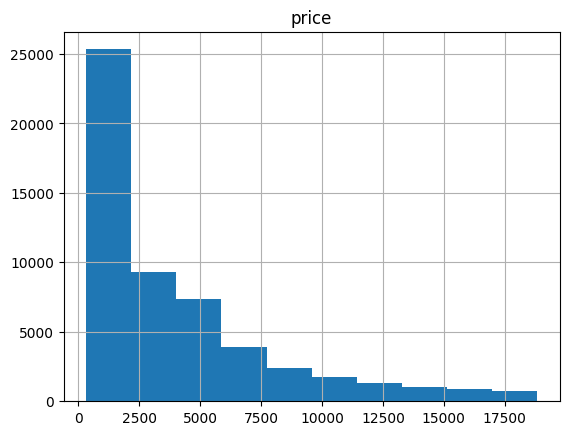

In [49]:
df.hist('price')

<AxesSubplot: >

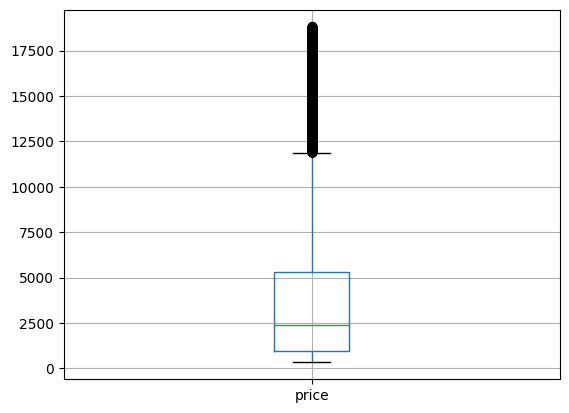

In [50]:
df.boxplot('price')

<AxesSubplot: ylabel='Density'>

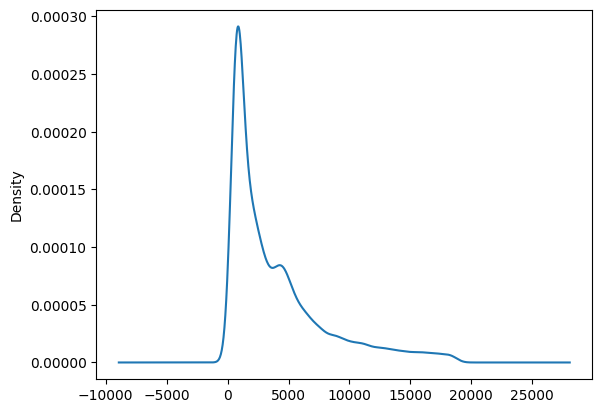

In [51]:
df['price'].plot.density()

### Is there trend visible in those plots? If yes, which is it and in which plots can you see it?

Histo plot: Most diamonds cost between 0 to 2500
Box plot: Many outliers higher than 12000, mean is very good visible here and for the histo plot.
Density plot: Most diamonds in the list cost between 0 to 2500, similar to histo plot.

## 3. Calculate and state the mean, median, standard deviation, median absolute deviation (MAD), 1st and 3rd quartile (Q1 and Q3), and inner quartile range of the diamond price.
• If you are not familiar with those functions: use Google, Wikipedia,
etc.
• Required commands are all in the provided script.

In [52]:
print('Mean: ')
df['price'].mean(axis=0)

Mean: 


3932.799721913237

In [53]:
print('Median: ')
df['price'].median(axis=0)

Median: 


2401.0

In [54]:
print('STD: ')
df['price'].std(axis=0)

STD: 


3989.439738146379

In [55]:
print('MAD: ')
# Mad function is deprecated
print((df['price'] - df['price'].mean()).abs().mean())

MAD: 
3031.603220851001


## 4. Plot the diamond price against the carat values as a scatterplot. Answer this question:
Hint: plotting many samples will be slow. Changing the plot symbol to '.' will cause a speedup.

<AxesSubplot: xlabel='price', ylabel='carat'>

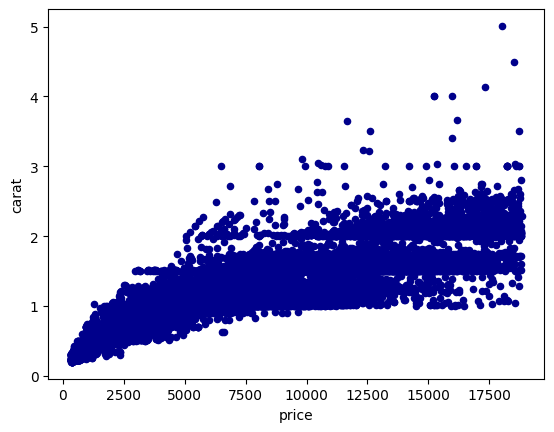

In [56]:
df.plot.scatter(x='price', y='carat', c='DarkBlue')

### Is there a trend visible in the plot? If yes, which is it?

## 5. Analyze the correlation between diamond price and diamond x, y, and z dimensions.

### Create pairwise plots for these features.

<AxesSubplot: xlabel='y', ylabel='z'>

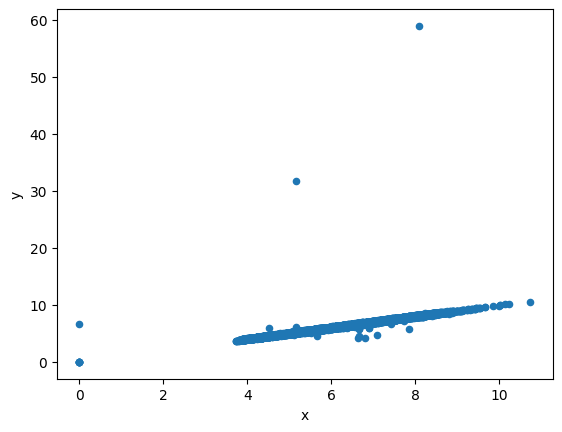

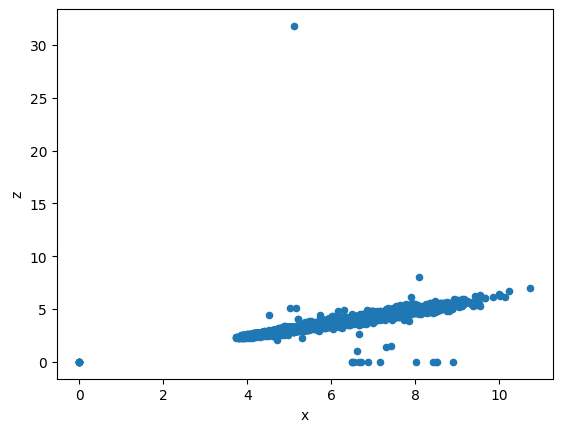

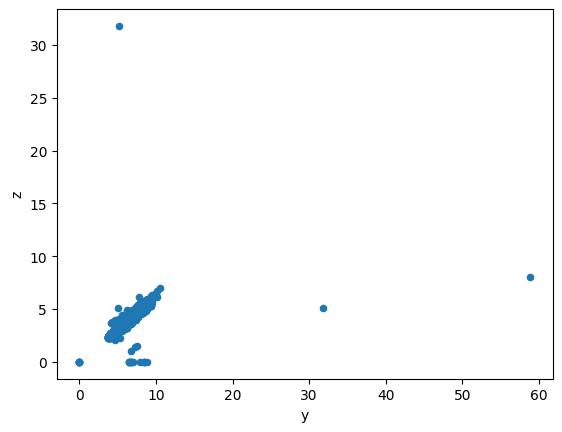

In [57]:
df.plot.scatter(x='x', y='y')
df.plot.scatter(x='x', y='z',)
df.plot.scatter(x='y', y='z')

### Is there a trend visible between x, y, and z? If yes, which is it?

### Is there a trend visible between the dimensions and the price? If yes, which is it?
• Hint: if you don’t know what a linear relation is (Google it!):
– Linear correlation: feature A low –> feature B low, and feature
A high –> feature B high.
– (Inverse) linear correlation is also a linear correlation: feature
A low –> feature B high, and feature A high –> feature B low:
inverse linear correlation. Usually also just called linear correlation.
– When plotting feature A against feature B and their points form
a “straight line”, then it’s a linear relationship between A and B
= linear correlation.

<AxesSubplot: xlabel='z', ylabel='price'>

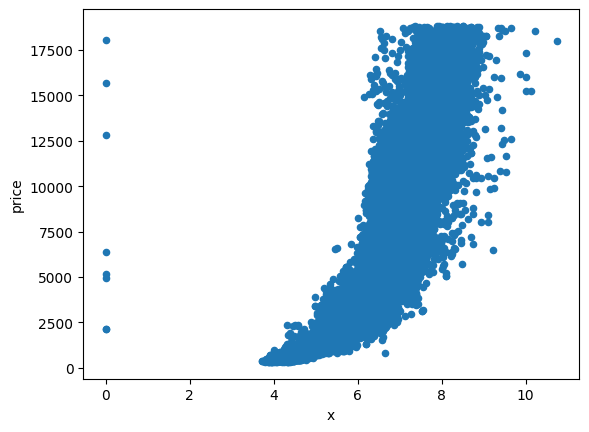

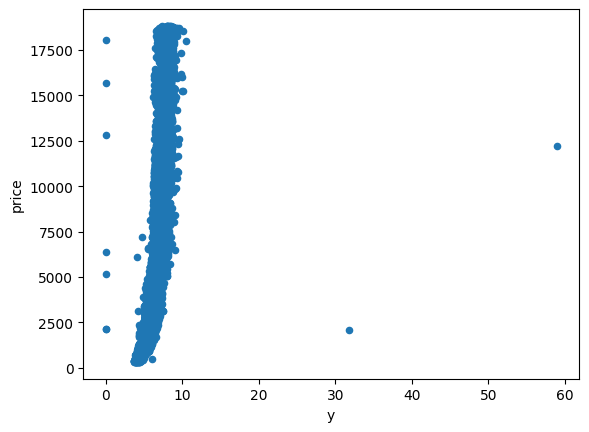

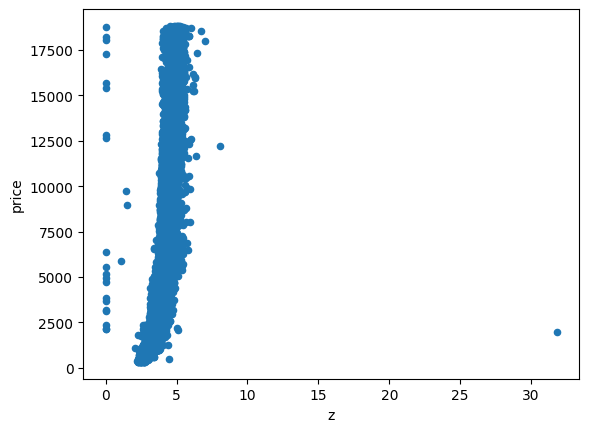

In [58]:
df.plot.scatter(x='x', y='price')
df.plot.scatter(x='y', y='price')
df.plot.scatter(x='z', y='price')

## 6. Analyze diamond prices per diamond color.

### Create boxplots showing diamond price boxes for each diamond color (all boxes should be in one figure).

<AxesSubplot: title={'center': 'price'}, xlabel='color'>

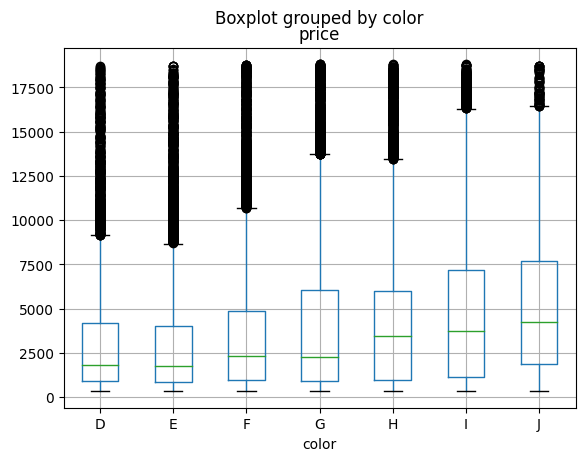

In [66]:
df.boxplot('price', by='color')

### Create densityplots showing diamond prices for each diamond color (all densities should be in one figure).

color
D    AxesSubplot(0.125,0.11;0.775x0.77)
E    AxesSubplot(0.125,0.11;0.775x0.77)
F    AxesSubplot(0.125,0.11;0.775x0.77)
G    AxesSubplot(0.125,0.11;0.775x0.77)
H    AxesSubplot(0.125,0.11;0.775x0.77)
I    AxesSubplot(0.125,0.11;0.775x0.77)
J    AxesSubplot(0.125,0.11;0.775x0.77)
Name: price, dtype: object

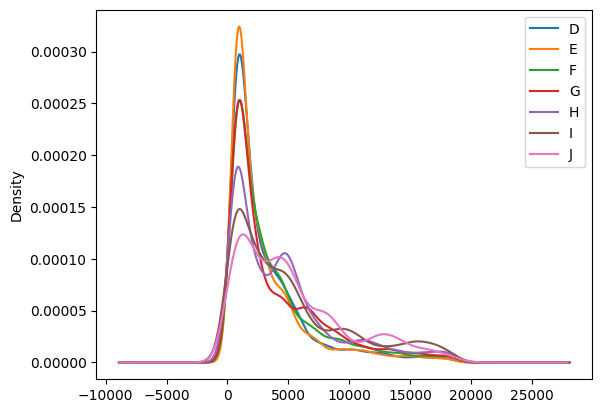

In [68]:
df.groupby('color')['price'].plot.density(legend=True)

### Answer this question: is there a trend visible? If yes, which one?

## 7. Use vectorized commands (= no loops!) to answer these questions:

### How many diamonds have a price above 9500?

### How many diamonds have a price above 9500 and have color “D”?

### What is the mean and std of the price of all color “D” diamonds with cut “Fair”?

### What is the median and mad of the price of all color “J” diamonds with cut “Ideal”?

### Create two copies of the dataframe that contains only the price and carat feature. Apply a log with base 10 to both features in one of those dataframes, and square (x' = x²) the features in the other dataframe. What is the mean and std of the transformed features in both dataframes?